# Laboratorios \#2 – Dpylr y ggplot

Importar las librerias

In [2]:
library(dplyr)
library(lubridate, warn.conflicts = FALSE)
library(ggplot2)

Leer el dataset

In [4]:
dataset = read.csv("dataset.csv")

In [8]:
dataset$cnt <- as.integer(dataset$cnt)
dataset$registered <- as.integer(dataset$registered)
dataset$casual <- as.integer(dataset$casual)

In [36]:
head(dataset, 10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,⋯,atemp,hum,windspeed,casual,registered,cnt,date,year,month,day
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,⋯,0.2879,0.81,0.0000,3,13,16,2011-01-01,2011,1,1
2,2,2011-01-01,1,0,1,1,0,6,0,1,⋯,0.2727,0.80,0.0000,8,32,40,2011-01-01,2011,1,1
3,3,2011-01-01,1,0,1,2,0,6,0,1,⋯,0.2727,0.80,0.0000,5,27,32,2011-01-01,2011,1,1
4,4,2011-01-01,1,0,1,3,0,6,0,1,⋯,0.2879,0.75,0.0000,3,10,13,2011-01-01,2011,1,1
5,5,2011-01-01,1,0,1,4,0,6,0,1,⋯,0.2879,0.75,0.0000,0,1,1,2011-01-01,2011,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,⋯,0.2576,0.75,0.0896,0,1,1,2011-01-01,2011,1,1
7,7,2011-01-01,1,0,1,6,0,6,0,1,⋯,0.2727,0.80,0.0000,2,0,2,2011-01-01,2011,1,1
8,8,2011-01-01,1,0,1,7,0,6,0,1,⋯,0.2576,0.86,0.0000,1,2,3,2011-01-01,2011,1,1
9,9,2011-01-01,1,0,1,8,0,6,0,1,⋯,0.2879,0.75,0.0000,1,7,8,2011-01-01,2011,1,1


1. Cree un conjunto de columnas nuvas: día, mes, año, hora y minutos a partir de la comlumna datetime, para esto investigue como puede “desarmar” la variable datetime utilizando lubridate y mutate.

In [10]:
dataset$date<- ymd(dataset$dteday)
dataset$year <- year(dataset$date)
dataset$month <- month(dataset$date)
dataset$day <- day(dataset$date)

2. ¿Qué mes es el que tiene la mayor demanda? Muestre una tabla y una gráfica

   month sum_count
1      1    134933
2      2    151352
3      3    228920
4      4    269094
5      5    331686
6      6    346342
7      7    344948
8      8    351194
9      9    345991
10    10    322352
11    11    254831
12    12    211036


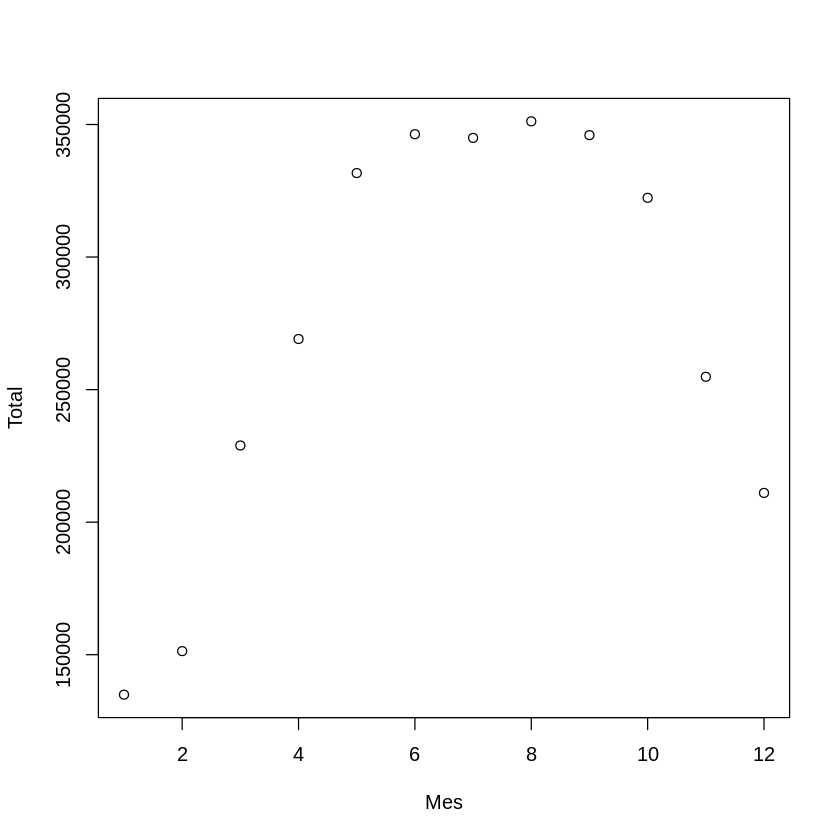

In [11]:
count_by_month <- aggregate(dataset$cnt, by=list(dataset$month), FUN=sum)
colnames(count_by_month)[1] = "month"
colnames(count_by_month)[2] = "sum_count"
print(count_by_month)
plot(count_by_month$month, count_by_month$sum_count, ylab = "Total", xlab = "Mes")

3. ¿Qué rango de hora es la de mayor demanda? Muestre una tabla y una gráfica

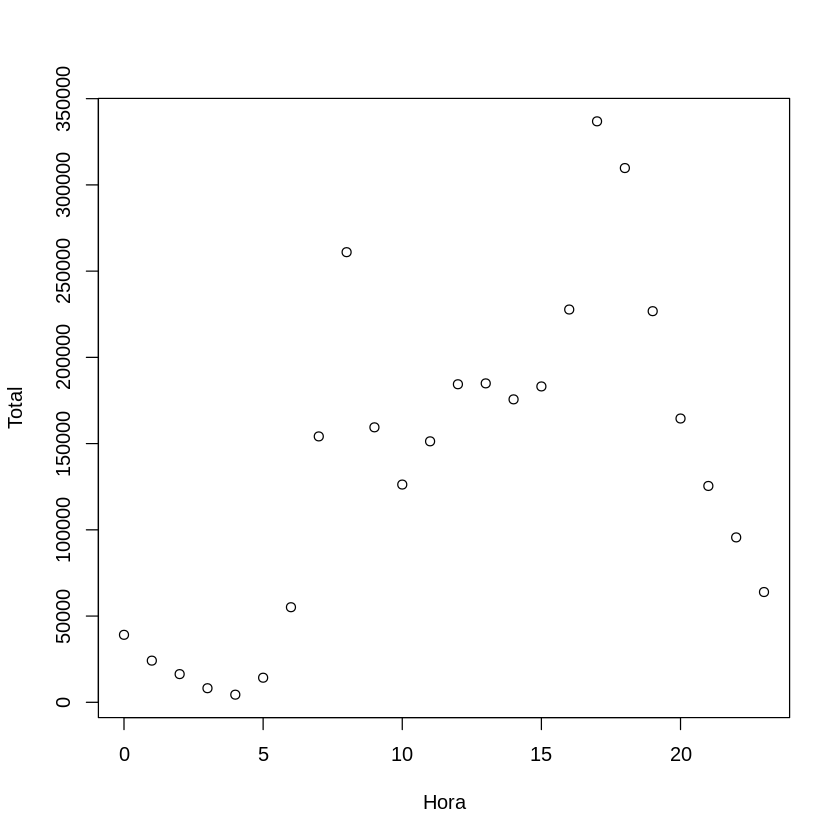

In [12]:
count_by_hours <- aggregate(dataset$cnt, by=list(dataset$hr), FUN=sum)
colnames(count_by_hours)[1] = "hour"
colnames(count_by_hours)[2] = "sum_count"
plot(count_by_hours$hour, count_by_hours$sum_count, ylab = "Total", xlab = "Hora")

4. ¿Qué temporada es la mas alta? Muestre una tabla.

In [13]:
count_by_season <- aggregate(dataset$cnt, by=list(dataset$season), FUN=sum)
colnames(count_by_season)[1] = "season"
colnames(count_by_season)[2] = "sum_count"
count_by_season <- count_by_season[order(-count_by_season$sum_count), ]
print(count_by_season) 

  season sum_count
3      3   1061129
2      2    918589
4      4    841613
1      1    471348


La temporada con mayor numero de rentas el la temporada 3 (fall) otoño. 

5. ¿A que temperatura disminuye la demanda? Muestre una gráfica para analizar y dar su respuesta.

**LA TEMPERATURA NO SE ENCUENTRA EN GRADOS CENTRIGRADOS**

temperature,mean
<dbl>,<dbl>
0.02,41.88235
0.04,35.62500
0.06,42.00000
0.08,28.23529
0.10,49.29412
0.12,58.42105
0.14,55.10870
0.16,65.57826
0.18,60.11613


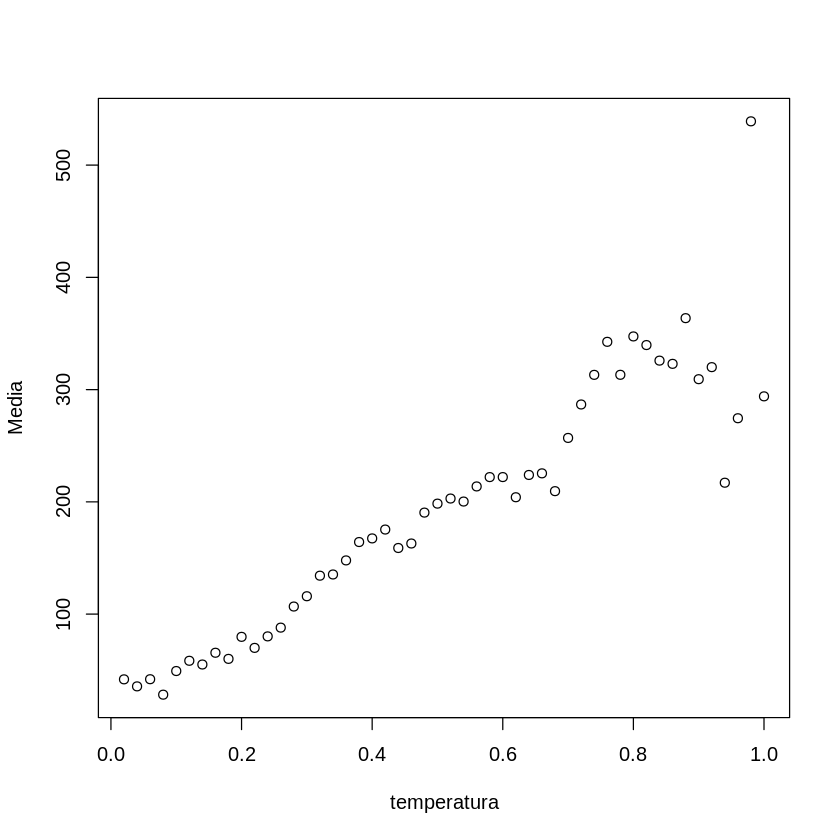

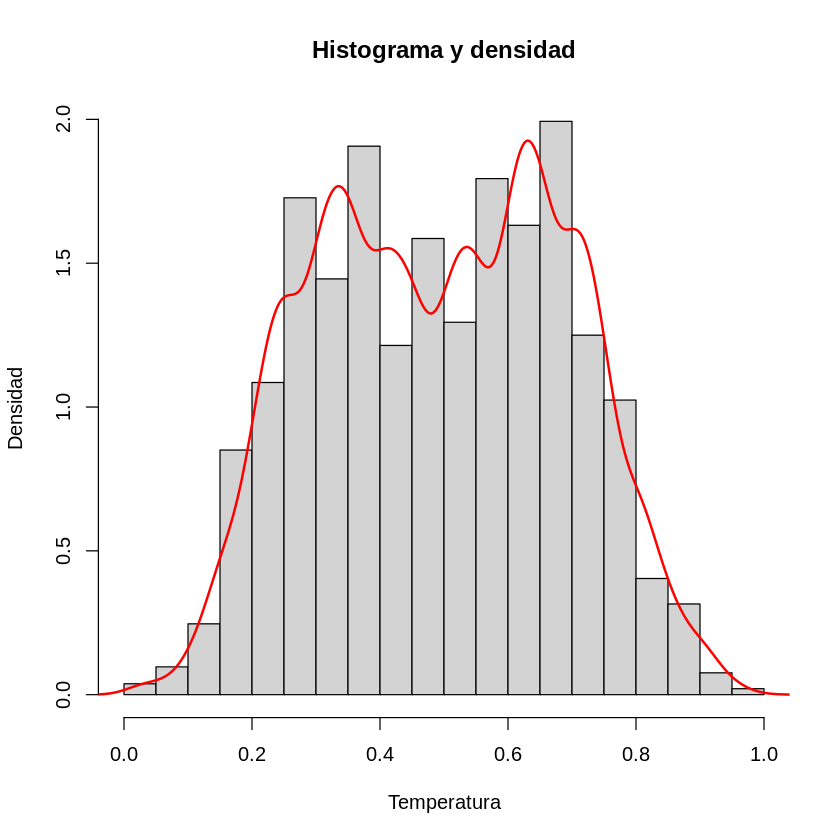

In [31]:
mean_by_temp <- aggregate(dataset$cnt, by=list(dataset$temp), FUN=mean)
colnames(mean_by_temp)[1] = "temperature"
colnames(mean_by_temp)[2] = "mean"
mean_by_temp
plot(mean_by_temp$temperature, mean_by_temp$mean, ylab = "Media", xlab = "temperatura")
hist(dataset$temp, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="Temperatura")
dtemp <- density(dataset$temp)
lines(dtemp, lwd = 2, col = "red")

  **La demanda diminuye cuando es la temperatura es menor a 0.6 y mayor a 0.9**

6. ¿A que humedad disminuye la demanda? Muestre una gráfica para analizar y dar su respuesta.

**LA HUMEDAD NO SE ENCUENTRA EN PORCENTAJE DE HUMEDAD RELATIVA**



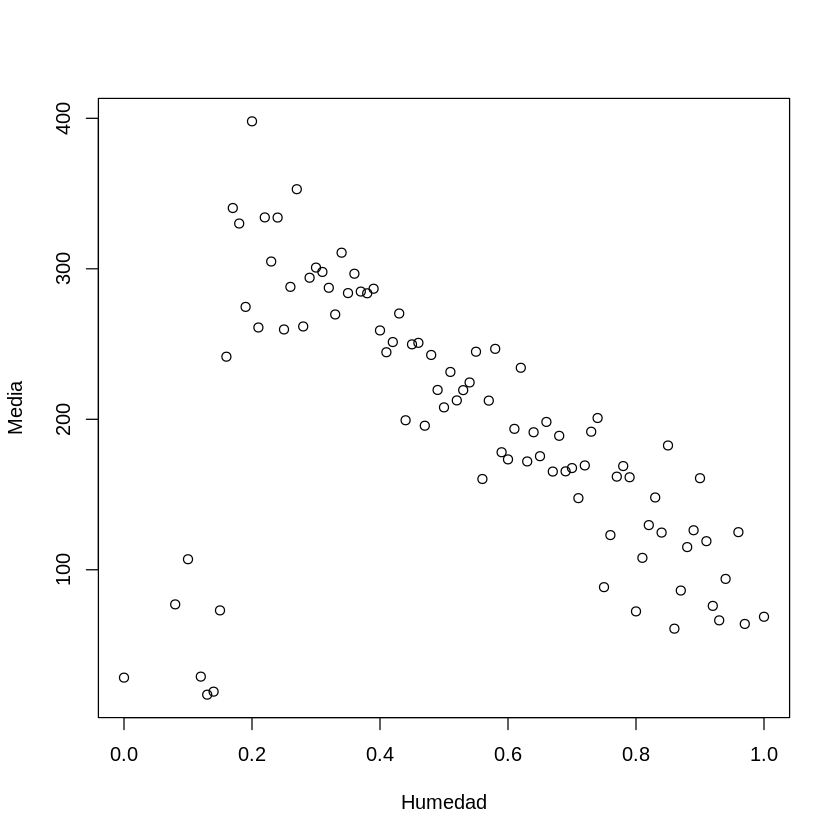

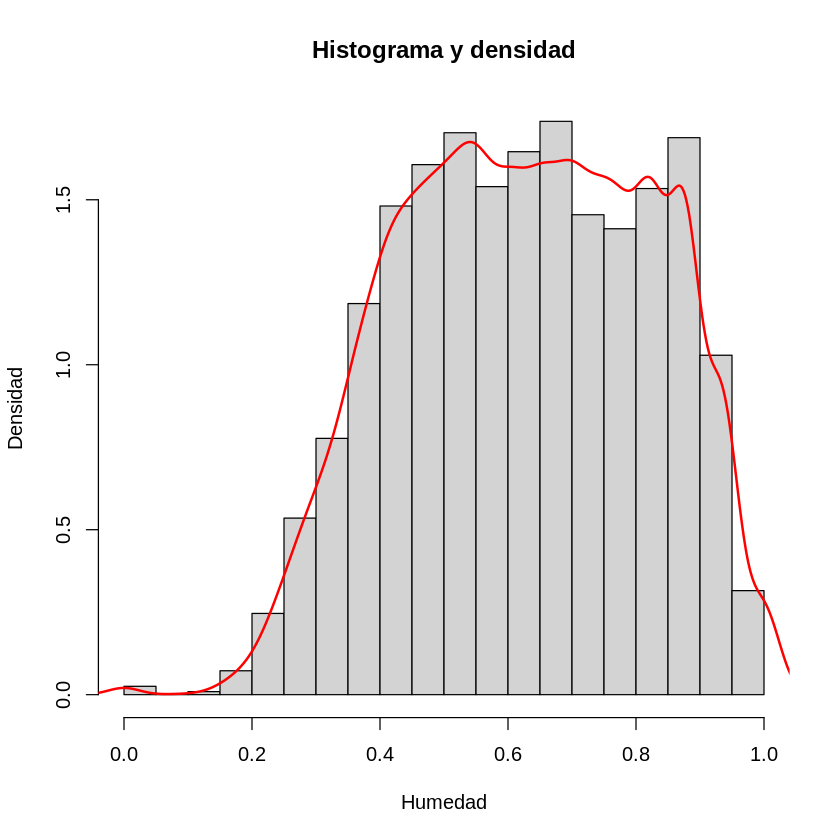

In [33]:
mean_by_hum <- aggregate(dataset$cnt, by=list(dataset$hum), FUN=mean)
colnames(mean_by_hum)[1] = "humedity"
colnames(mean_by_hum)[2] = "mean"
plot(mean_by_hum$humedity, mean_by_hum$mean, xlab = "Humedad", ylab = "Media")
hist(dataset$hum, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="Humedad")
dhum <- density(dataset$hum)
lines(dhum, lwd = 2, col = "red")

  **La demanda diminuye cuando es la humedad es menor a 0.2 y mayor a 0.4**

7. ¿Que condiciones climáticas serian ideales para nuestra demanda? (considere una función de densidad bivariable para la temperatura y la humedad)

Las condiciones ideales son con una temperatura entre (0.7 a 0.9) con una humedad entre (0.2 a 0.4).

8.  Mueste una gráfica de la densidad de rentas.*texto en cursiva*

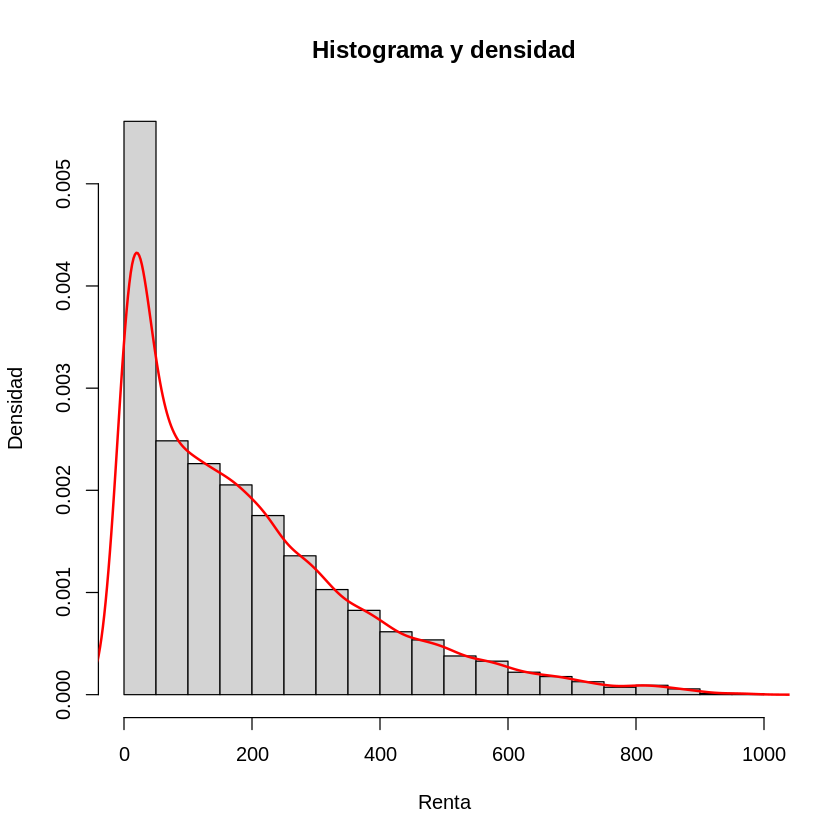

In [14]:
hist(dataset$cnt, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="Renta")
drent <- density(dataset$cnt)
lines(drent, lwd=2, col="red")

 9. ¿En promedio de personas que rentan bicicletas y están registradas? 

In [15]:
mean(dataset$registered)

[1] 153.7869

El porcentaje de biciclentas que estan registradas

In [16]:
percent <-   sum(dataset$registered) / sum(dataset$cnt) * 100
percent

[1] 81.16983

10. Determine la mediana de personas que rentan bicicletas y no están registradas.

In [17]:
median(dataset$casual)

[1] 17

11. Deterimne la renta total, renta promedio por cada tipo de estación.

In [18]:
sum_mean_by_season <- aggregate(dataset$cnt, by=list(dataset$season), function(x) cbind( sum(x),mean(x)))
colnames(sum_mean_by_season)[1] = "season"
sum_mean_by_season

season,x
<int>,"<dbl[,2]>"
1,"471348, 111.1146"
2,"918589, 208.3441"
3,"1061129, 236.0162"
4,"841613, 198.8689"


 12. Determine y muestre una gráfica de barras la cantidad de rentas por tipo de temporada.

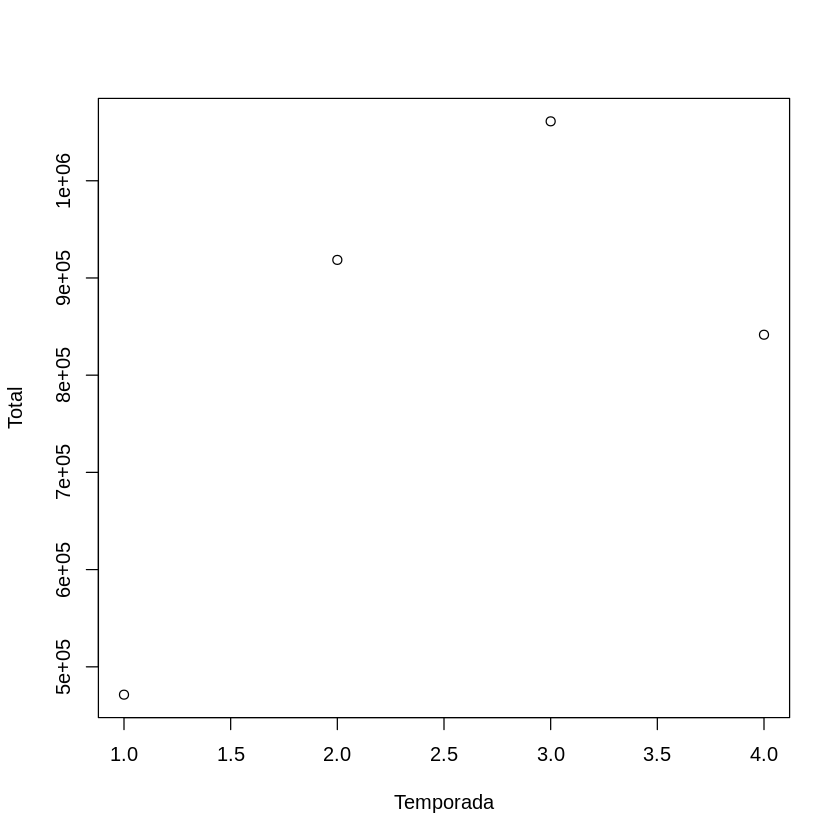

In [19]:
plot(sum_mean_by_season$season, sum_mean_by_season$x[,1], ylab = "Total", xlab = "Temporada")

13. Muestre una gráfica de la densidad por hora.

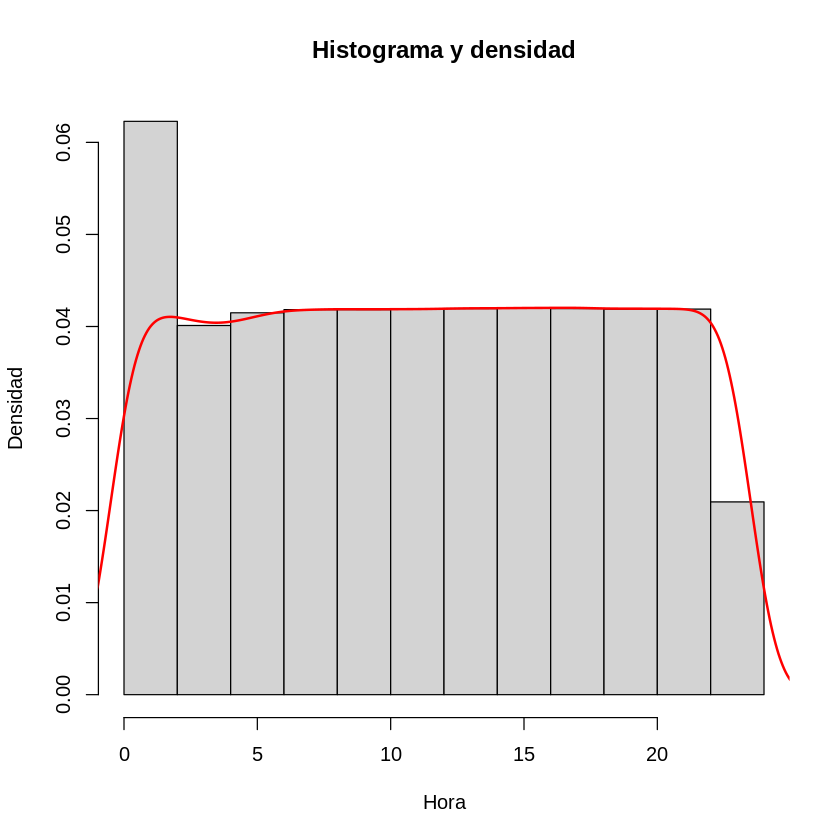

In [20]:
hist(dataset$hr, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="Hora")
dhr <- density(dataset$hr)
lines(dhr, lwd=2, col="red")

 14. Muestre una gráfica de barras por día del mes como eje x y la cantidad total de alquileres como el eje Y.

day,sum_count
<int>,<int>
1,103692
2,105381
3,111561
4,112335
5,109115
6,108600
7,105486
8,102770
9,108041


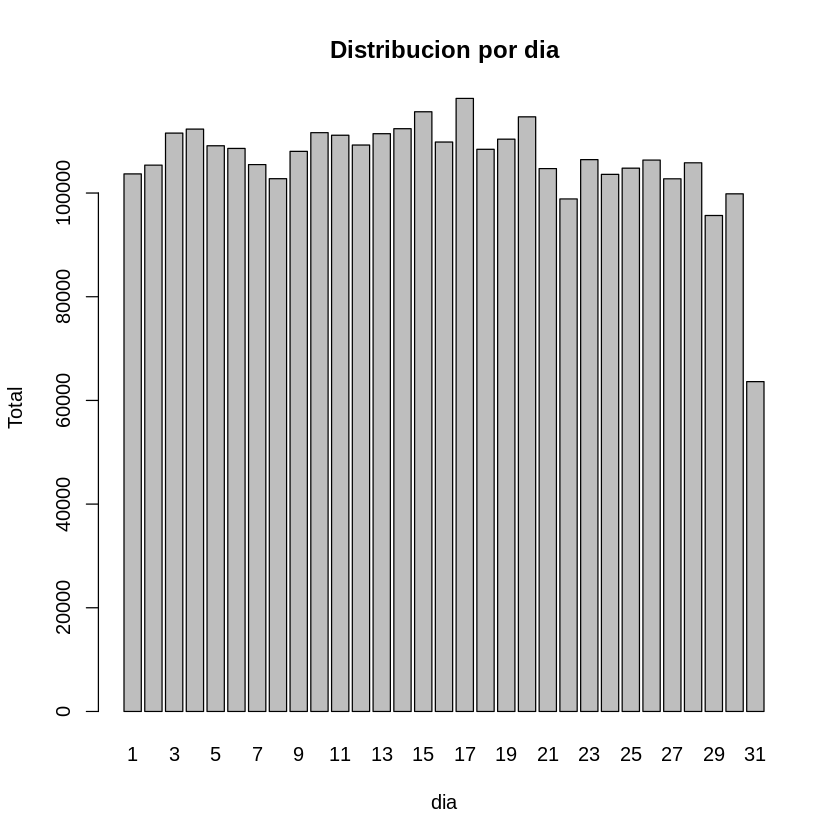

In [21]:
count_by_day <- aggregate(dataset$cnt, by=list(dataset$day), FUN=sum)
colnames(count_by_day)[1] = "day"
colnames(count_by_day)[2] = "sum_count"
count_by_day
options(scipen=999)
barplot(count_by_day$sum_count, main = "Distribucion por dia", names.arg =   count_by_day$day, ylab = "Total", xlab = "dia")

15. Muestre una serie temporal (gráfica) con el tiempo (mes-dia-año) como eje de tiempo y la cantidad de alquieleres como eje Y.

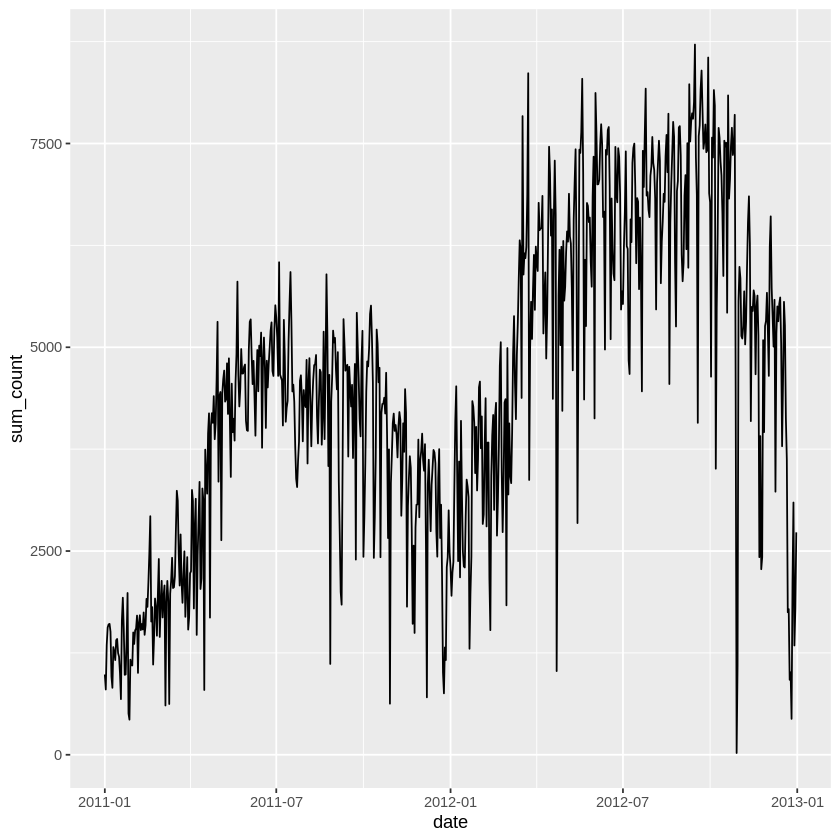

In [25]:
count_by_date <- aggregate(dataset$cnt, by=list(dataset$date), FUN=sum)
colnames(count_by_date)[1] = "date"
colnames(count_by_date)[2] = "sum_count"
ggplot(count_by_date, aes(x=date, y=sum_count)) +
       geom_line()

16. Muestre una gráfica de puntos que relaciones la temperatura comoejer X y la humedad como eje Y.

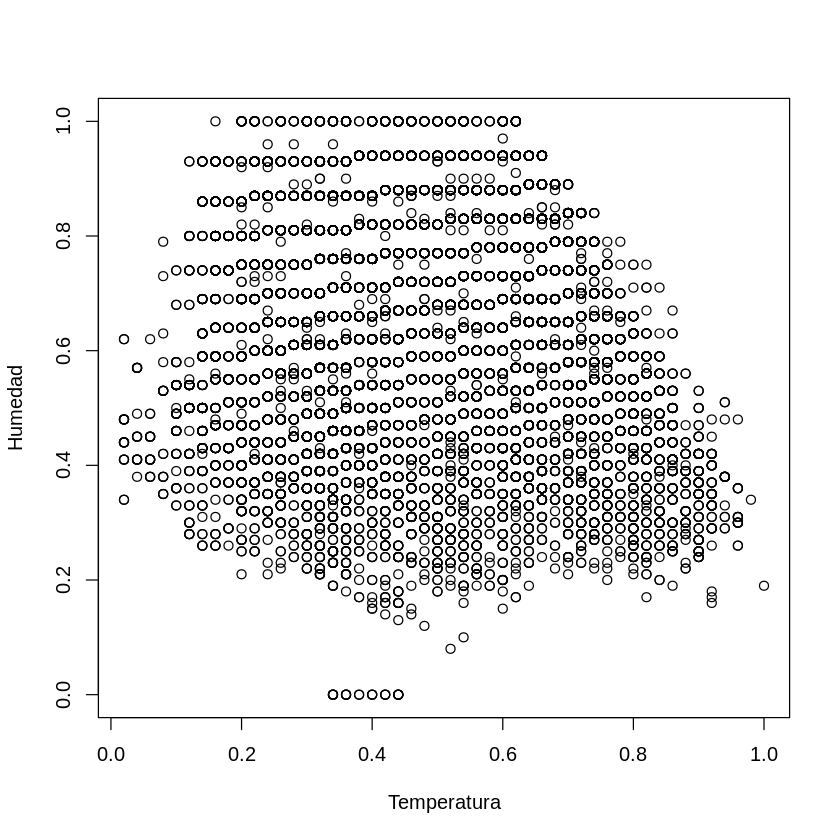

In [28]:
plot(dataset$temp, dataset$hum, ylab = "Humedad", xlab = "Temperatura")